In [35]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import gc

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder


In [2]:
import tokenizers
import transformers
from transformers import AutoTokenizer, AutoModel, AutoConfig




In [3]:
data = pd.read_csv("Daftar Judul dengan subject (1).csv")

In [4]:
data

,Kelas,Judul,Subject,Pengarang,Kota Terbit,Penerbit,Tahun Terbit,Eksemplar,Lokasi
0,345,Asas-asas hukum pidana: bagian pertama,HUKUM PIDANA,"ABIDIN, Zainal Andi",Bandung,Alumni,1987.0,4,PUSAT
1,808,Perdebatan sastra kontekstual,KESUSASTRAAN,"HERYANTO, Ariel",Jakarta,Rajawali,1985.0,4,PUSAT
2,621.6,Pompa dan blower sentrifugal/penerjemah Zulkif...,MESIN POMPA,"CHURCH, AUSTIN H.",Jakarta,Erlangga,1986.0,6,PUSAT
3,346.02,Hukum perjanjian: perjanjian pada umumnya,HUKUM PERJANJIAN,"SATRIO, J.",Bandung,Citra Aditya Bakti,1992.0,28,PUSAT
4,621.43,Turbin uap: teori dan rancangan,TURBIN UAP,"SHLYAKHIN, P.",Jakarta,Erlangga,1999.0,12,PUSAT
...,...,...,...,...,...,...,...,...,...
69390,572.33,"Permukaan biomaterial: strategi modifikasi, ka...",BIOMATERIAL,"PIDHATIKA, Bidhari",Yogyakarta,Gadjah Mada University Press,2021.0,2,PUSAT
69391,615.78,Modul pengantar aspek forensik NAPZA,NARKOTIKA,NaN,Yogyakarta,Gadjah Mada University Press,2021.0,2,PUSAT
69392,612.13,Seputar AV Shunt,PEMBULUH DARAH ARTERIOVENOUS,NaN,Yogyakarta,Gadjah Mada University Press,2022.0,2,PUSAT
69393,378.1,Kurikulum berbasis kompetensi (capaian pembela...,PENDIDIKAN KEDOKTERAN,"PRIHATININGSIH, Titi Savitri",Yogyakarta,Gadjah Mada University Press,2022.0,2,PUSAT


In [5]:
data.head()

,Kelas,Judul,Subject,Pengarang,Kota Terbit,Penerbit,Tahun Terbit,Eksemplar,Lokasi
0,345,Asas-asas hukum pidana: bagian pertama,HUKUM PIDANA,"ABIDIN, Zainal Andi",Bandung,Alumni,1987.0,4,PUSAT
1,808,Perdebatan sastra kontekstual,KESUSASTRAAN,"HERYANTO, Ariel",Jakarta,Rajawali,1985.0,4,PUSAT
2,621.6,Pompa dan blower sentrifugal/penerjemah Zulkif...,MESIN POMPA,"CHURCH, AUSTIN H.",Jakarta,Erlangga,1986.0,6,PUSAT
3,346.02,Hukum perjanjian: perjanjian pada umumnya,HUKUM PERJANJIAN,"SATRIO, J.",Bandung,Citra Aditya Bakti,1992.0,28,PUSAT
4,621.43,Turbin uap: teori dan rancangan,TURBIN UAP,"SHLYAKHIN, P.",Jakarta,Erlangga,1999.0,12,PUSAT


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69395 entries, 0 to 69394
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kelas         65834 non-null  object 
 1   Judul         69395 non-null  object 
 2   Subject       68853 non-null  object 
 3   Pengarang     63115 non-null  object 
 4   Kota Terbit   64674 non-null  object 
 5   Penerbit      68945 non-null  object 
 6   Tahun Terbit  63666 non-null  float64
 7   Eksemplar     69395 non-null  int64  
 8   Lokasi        69395 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.8+ MB


In [7]:
# konversi kolom 'col_name' menjadi numerik
data['Kelas'] = pd.to_numeric(data['Kelas'], errors='coerce')

# errors='coerce' akan mengubah nilai yang tidak valid menjadi NaN
# jika tidak menggunakan 'coerce', nilai yang tidak valid akan memunculkan kesalahan ValueErro

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69395 entries, 0 to 69394
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kelas         65140 non-null  float64
 1   Judul         69395 non-null  object 
 2   Subject       68853 non-null  object 
 3   Pengarang     63115 non-null  object 
 4   Kota Terbit   64674 non-null  object 
 5   Penerbit      68945 non-null  object 
 6   Tahun Terbit  63666 non-null  float64
 7   Eksemplar     69395 non-null  int64  
 8   Lokasi        69395 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 4.8+ MB


In [9]:
fill=data["Kelas"].mean()
data["Kelas"]=data["Kelas"].fillna(fill)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69395 entries, 0 to 69394
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kelas         69395 non-null  float64
 1   Judul         69395 non-null  object 
 2   Subject       68853 non-null  object 
 3   Pengarang     63115 non-null  object 
 4   Kota Terbit   64674 non-null  object 
 5   Penerbit      68945 non-null  object 
 6   Tahun Terbit  63666 non-null  float64
 7   Eksemplar     69395 non-null  int64  
 8   Lokasi        69395 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 4.8+ MB


In [11]:
# Menghapus dokumen yang memiliki nilai NaN dari dataframe
data = data.dropna(subset=["Subject"])

# Mengumpulkan seluruh judul yang memiliki value counts 1
unique_titles = data["Judul"].value_counts()[data["Judul"].value_counts() == 1].index.tolist()

# Mengumpulkan dokumen yang memiliki judul unik tersebut
unique_docs = data[data["Judul"].isin(unique_titles)]["Subject"].tolist()


In [12]:
# Mengganti nilai NaN dengan string kosong
data = data.fillna("")

# Mengumpulkan seluruh judul yang memiliki value counts 1
unique_titles = data["Judul"].value_counts()[data["Judul"].value_counts() == 1].index.tolist()

# Mengumpulkan dokumen yang memiliki judul unik tersebut
unique_docs = data[data["Judul"].isin(unique_titles)]["Subject"].tolist()


In [13]:
data.Kelas.nunique()

8981

In [14]:
data.Judul.nunique()

66046

In [17]:
data['Subject'].value_counts()

Kedokteran_Umum                                             466
ISLAM                                                       432
PENDIDIKAN                                                  405
MANAJEMEN                                                   316
BAHASA INGGRIS                                              303
                                                           ... 
EKONOMI ISLAM, PERBANKAN, BANK ISLAM, PERUNDANG-UNDANGAN      1
EKONOMI ISLAM, PENJUALAN SAHAM, PERATURAN                     1
EKONOMI ISLAM, PERBANKAN, TANYA JAWAB                         1
PERGURUAN TINGGI, INFORMASI, ISLAMIC ACADEMY OF SCIENCES      1
METODE PENELITIAN MANAJEMEN RUMAH SAKIT                       1
Name: Subject, Length: 28048, dtype: int64

In [18]:
data['Judul'].value_counts()

The macmillan family encyclopedia                                                  21
The Encyclopedia Americana                                                         17
Fikih sunnah                                                                       16
Psikologi pendidikan                                                               15
Yurisprudensi Indonesia                                                            14
                                                                                   ..
Penuntun terbaru untuk penggunaan IBM PC dan PS/2                                   1
Ibn Khaldun and the medieval Maghrib                                                1
Rokok kretek: lintasan sejarah dan artinya bagi pem-bangunan bangsa dan negara      1
Teori apresiasi prosa                                                               1
Prinsip dan aplikasi untuk manajemen rumah sakit                                    1
Name: Judul, Length: 66046, dtype: int64

In [19]:
data['Kelas'].value_counts()

6383.688453    3975
297.122000      823
813.000000      508
428.000000      469
297.130000      403
               ... 
306.845000        1
635.648000        1
611.013000        1
616.890076        1
647.726000        1
Name: Kelas, Length: 8981, dtype: int64

In [20]:
data = data[data['Kelas'].map(data['Kelas'].value_counts()) > 1]

In [21]:
data['Kelas'].value_counts()

6383.688453    3975
297.122000      823
813.000000      508
428.000000      469
297.130000      403
               ... 
631.523000        2
664.900000        2
363.450260        2
232.900000        2
658.159800        2
Name: Kelas, Length: 4437, dtype: int64

In [22]:
data = data[data['Judul'].map(data['Judul'].value_counts()) > 1]

In [23]:
data = data[data['Subject'].map(data['Subject'].value_counts()) > 1]

In [24]:
data['Judul'].value_counts()

The macmillan family encyclopedia                                                  21
The Encyclopedia Americana                                                         17
Fikih sunnah                                                                       16
Yurisprudensi Indonesia                                                            13
Psikologi pendidikan                                                               13
                                                                                   ..
Mencari Tuhan dengan kacamata barat: kajian kritis mengenai agama di Indonesia      1
Oliver twist                                                                        1
Review of medical physiology                                                        1
Negara adil makmur menurut Ibnu Siena                                               1
The handbook of school psychology                                                   1
Name: Judul, Length: 1520, dtype: int64

In [25]:
data['Subject'].value_counts()

Kedokteran_Umum         125
PENDIDIKAN               61
ISLAM                    49
FIKIH                    46
MANAJEMEN                46
                       ... 
PENELITIAN KESEHATAN      2
STUDI KELAYAKAN           2
PENYAKIT MATA             2
GENETIKA                  2
TEKNOLOGI                 2
Name: Subject, Length: 702, dtype: int64

In [26]:
data

,Kelas,Judul,Subject,Pengarang,Kota Terbit,Penerbit,Tahun Terbit,Eksemplar,Lokasi
7,1.0000,Teknik menambah dan mengembangkan ilmu pengeta...,ILMU PENGETAHUAN UMUM,"MANGUNHARDJANA, A.M.",Yogyakarta,Kanisius,1992.0,6,PUSAT
13,346.0700,Hukum dagang tentang surat-surat berharga,HUKUM DAGANG,"MUHAMMAD, Abdulkadir",Bandung,Citra Aditya Bakti,1993.0,18,PUSAT
18,320.1000,Kewiraan untuk mahasiswa,"KEWIRAAN, ILMU","INDONESIA, Lemhanas",Jakarta,Gramedia Pustaka Utama,1992.0,5,PUSAT
22,320.0000,Pengantar ilmu politik,"POLITIK, ILMU","ISJWARA, F.",Bandung,Binacipta,1980.0,9,PUSAT
32,616.1200,Pengantar kardiologi,KARDIOLOGI,"KERTOHOESODO, SOEHARDO",Jakarta,UI-Press,1987.0,10,PUSAT
...,...,...,...,...,...,...,...,...,...
69282,657.0285,Sistem informasi akuntansi,SISTEM INFORMASI AKUNTANSI,,Yogyakarta,Graha Ilmu,2019.0,2,PUSAT
69284,657.0000,Akuntansi manajemen,AKUNTANSI MANAJEMEN,"PRAMESTI, Hernawati",Yogyakarta,Graha Ilmu,2021.0,2,PUSAT
69340,658.1500,Manajemen keuangan,MANAJEMEN KEUANGAN,"DIANA, Anastasia",Yogya,Andi,2022.0,2,PASCA
69374,657.6100,Akuntansi sektor publik,AKUNTANSI SEKTOR PUBLIK,MAHMUDI,Yogya,UII Press,2018.0,2,PASCA


nanti di drop dlu yang ga digunakan 

In [27]:
data_clustered = data.drop(['Pengarang','Kota Terbit', 'Penerbit', 'Tahun Terbit', 'Eksemplar', 'Lokasi'], axis = 1)

In [28]:
data_clustered

,Kelas,Judul,Subject
7,1.0000,Teknik menambah dan mengembangkan ilmu pengeta...,ILMU PENGETAHUAN UMUM
13,346.0700,Hukum dagang tentang surat-surat berharga,HUKUM DAGANG
18,320.1000,Kewiraan untuk mahasiswa,"KEWIRAAN, ILMU"
22,320.0000,Pengantar ilmu politik,"POLITIK, ILMU"
32,616.1200,Pengantar kardiologi,KARDIOLOGI
...,...,...,...
69282,657.0285,Sistem informasi akuntansi,SISTEM INFORMASI AKUNTANSI
69284,657.0000,Akuntansi manajemen,AKUNTANSI MANAJEMEN
69340,658.1500,Manajemen keuangan,MANAJEMEN KEUANGAN
69374,657.6100,Akuntansi sektor publik,AKUNTANSI SEKTOR PUBLIK


In [29]:
data_clustered['Subject'].value_counts()

Kedokteran_Umum         125
PENDIDIKAN               61
ISLAM                    49
FIKIH                    46
MANAJEMEN                46
                       ... 
PENELITIAN KESEHATAN      2
STUDI KELAYAKAN           2
PENYAKIT MATA             2
GENETIKA                  2
TEKNOLOGI                 2
Name: Subject, Length: 702, dtype: int64

In [30]:
data_clustered['Judul'].value_counts()

The macmillan family encyclopedia                                                  21
The Encyclopedia Americana                                                         17
Fikih sunnah                                                                       16
Yurisprudensi Indonesia                                                            13
Psikologi pendidikan                                                               13
                                                                                   ..
Mencari Tuhan dengan kacamata barat: kajian kritis mengenai agama di Indonesia      1
Oliver twist                                                                        1
Review of medical physiology                                                        1
Negara adil makmur menurut Ibnu Siena                                               1
The handbook of school psychology                                                   1
Name: Judul, Length: 1520, dtype: int64

<AxesSubplot:>

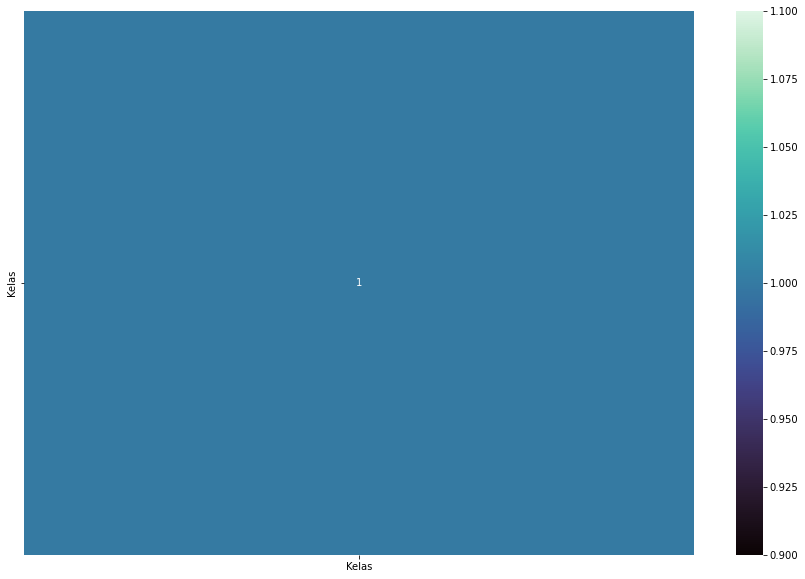

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
sns.heatmap(data_clustered.corr() , annot =True , cmap = 'mako' )

/Users/aisyah/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


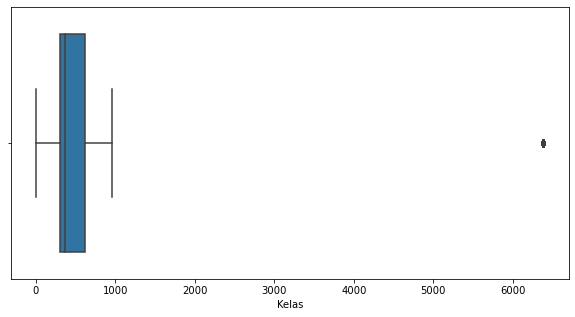

In [32]:
#Check Outlier on the ph variable
plt.figure(figsize=(10,5))
sns.boxplot(data_clustered["Kelas"])
plt.show()

In [44]:
import collections

# Menggabungkan semua teks menjadi satu string
all_text = ' '.join(data_clustered["Subject"])

# Memecah string menjadi kata-kata
words = all_text.split()

# Menghitung frekuensi kata
word_counts = collections.Counter(words)

# Total frekuensi kata dalam data
total_frequency = sum(word_counts.values())

# Menentukan persentase batas minimum
percentage_threshold = 0.01

# Menghitung batas minimum frekuensi
minimum_frequency = percentage_threshold * total_frequency


In [45]:
minimum_frequency

55.13

In [46]:
# Mengidentifikasi outlier
outliers = [word for word, count in word_counts.items() if count < minimum_frequency]

In [47]:
print("Outliers:")
for outlier in outliers:
    print(outlier)


Outliers:
PENGETAHUAN
UMUM
DAGANG
KEWIRAAN,
POLITIK,
KARDIOLOGI
KEBIDANAN,
PERAWAT
DAN
KEPERAWATAN
AGAMA
LINGUISTIK
KALKULUS
PERADILAN
TATA
NEGARA
BEDAH,
DEMOKRASI
PANCASILA
MIKROEKONOMI
ADAT
PENGADILAN
NEGERI
BOTANI
METODOLOGI
INTERNASIONAL
SEKTOR
PUBLIK
POLITIK
PUISI
PIDANA
PERTANIAN
MIKROBIOLOGI
MATEMATIKA
EKONOMI,
RESIKO
PATOLOGI
AKUNTANSI,
LAPORAN
KEUANGAN
PERJANJIAN
KESUSASTERAAN
MAKROEKONOMI
SEMANTIK
LOGIKA
ETIKA
MENGGAMBAR
TEKNIK
AGAMA,
PERBANDINGAN
PERKAWINAN
ISLAM,
PEMIKIRAN
REMAJA
KEPRIBADIAN
ALJABAR
PRODUKSI
AUDITING
EKSEKUTIF
PERKEMBANGAN
ELEKTRONIKA
ISLAM-PEMBAHARUAN
MUHAMMADIYAH
INGGRIS
PEMERINTAHAN
STATISTIK
INGGRIS,
SOSIAL,
PERUBAHAN
KIMIA
ANORGANIK
ANATOMI
FISIOLOGI
PROGRAM
LINEAR
SISTEM
NASIONAL
KONSELING,
PSIKOTERAPI
KONSTRUKSI
KAYU
INGGRIS-TATA
SOSIAL
KOMPUTER,
MENULIS
FOTOGRAFI
INFORMASI
GEOGRAFI-FISIK
KAPAL
MESIN
ISLAM-SEJARAH
PENDIDIKAN,
SOSIAL-PENELITIAN
GEOGRAFI
AL
QUR'AN
-
METODE
BELAJAR
FILSAFAT
MEKANIKA
TANAH
IJTIHAD
BIAYA
HUKUM,
ALJABAR,
TRIGONOMETRI
NEGAR

In [48]:
import collections

# Menggabungkan semua teks menjadi satu string
all_text = ' '.join(data_clustered["Subject"])

# Memecah string menjadi kata-kata
words = all_text.split()

# Menghitung frekuensi kata
word_counts = collections.Counter(words)

# Batas minimum frekuensi
minimum_frequency = 55.13

# Mengganti outlier dengan kata atau nilai lain
replaced_words = [word if word_counts[word] >= minimum_frequency else "OUTLIER" for word in words]

# Menggabungkan kata-kata yang telah diganti kembali menjadi teks
replaced_text = ' '.join(replaced_words)


In [49]:
#cek outlier Judul 

import collections

# Menggabungkan semua teks menjadi satu string
all_text = ' '.join(data_clustered["Judul"])

# Memecah string menjadi kata-kata
words = all_text.split()

# Menghitung frekuensi kata
word_counts = collections.Counter(words)

# Total frekuensi kata dalam data
total_frequency = sum(word_counts.values())

# Menentukan persentase batas minimum
percentage_threshold = 0.01

# Menghitung batas minimum frekuensi
minimum_frequency = percentage_threshold * total_frequency

In [50]:
minimum_frequency

129.22

In [51]:
# Mengidentifikasi outlier
outliers = [word for word, count in word_counts.items() if count < minimum_frequency]

In [52]:
print("Outliers:")
for outlier in outliers:
    print(outlier)


Outliers:
Teknik
menambah
mengembangkan
ilmu
pengetahuan
Hukum
dagang
tentang
surat-surat
berharga
Kewiraan
untuk
mahasiswa
politik
kardiologi
Dasar-dasar
Obstetri
sosial
patologi
Proses
keperawatan
Sosiologi
agama
linguistik
umum
Calculus
with
applications
acara
peradilan
fisiologi
operatif
hukum
Ilmu
tata
negara
Bedah
perawatannya
Demokrasi
pancasila
teori
mikroekonomi
ekonomi
perjanjian
adat
Pedoman
pelaksanaan
pelayanan
dasar
di
rumah
sakit
Lembaga
usaha
negara:
suatu
orientasi
pengenalan
geografi
tumbuhan
beberapa
serumpun/penerjemah
Gembong
Tjitrosoepomo
Metode
penelitian
Ekonomi
internasional
Akuntansi
sektor
publik.--
ed.1
Ekonomika
pembangunan
Teori
apresiasi
puisi
Perbandingan
pidana
pertanian
mikrobiologi
Matematika
manajemen
Manajemen:
pengantar
Manajemen
risiko
Psikologi
membimbing
biaya
Pathology
illustrated
Analisa
laporan
keuangan
Aneka
Tifa
penyair
daerahnya
Pengajaran
sastra
Indonesia:
respons
analisis
Intermediate
accounting.--
Ed.5
makro
semantik
Sejarah
pemikiran
s

In [53]:
import collections

# Menggabungkan semua teks menjadi satu string
all_text = ' '.join(data_clustered["Judul"])

# Memecah string menjadi kata-kata
words = all_text.split()

# Menghitung frekuensi kata
word_counts = collections.Counter(words)

# Batas minimum frekuensi
minimum_frequency = 55.13

# Mengganti outlier dengan kata atau nilai lain
replaced_words = [word if word_counts[word] >= minimum_frequency else "OUTLIER" for word in words]

# Menggabungkan kata-kata yang telah diganti kembali menjadi teks
replaced_text = ' '.join(replaced_words)

In [54]:
data_clustered

,Kelas,Judul,Subject
7,1.0000,Teknik menambah dan mengembangkan ilmu pengeta...,ILMU PENGETAHUAN UMUM
13,346.0700,Hukum dagang tentang surat-surat berharga,HUKUM DAGANG
18,320.1000,Kewiraan untuk mahasiswa,"KEWIRAAN, ILMU"
22,320.0000,Pengantar ilmu politik,"POLITIK, ILMU"
32,616.1200,Pengantar kardiologi,KARDIOLOGI
...,...,...,...
69282,657.0285,Sistem informasi akuntansi,SISTEM INFORMASI AKUNTANSI
69284,657.0000,Akuntansi manajemen,AKUNTANSI MANAJEMEN
69340,658.1500,Manajemen keuangan,MANAJEMEN KEUANGAN
69374,657.6100,Akuntansi sektor publik,AKUNTANSI SEKTOR PUBLIK


In [55]:
import re

In [56]:
def text_cleaning(data):
  temporary_text = []

  for text in data:
    # removal of links[https://blabala.com]
    text = re.sub(r"http\S+", "", text)

    # removal of new line
    text = re.sub('\n', '', text)

    # removal of RT
    text = re.sub('RT', '', text)

    # removal of punctuations and numbers
    text = re.sub("[^a-zA-Z^']", " ", text)
    text = re.sub(" {2,}", " ", text)

    # remove leading and trailing whitespace
    text = text.strip()

    # remove whitespace with a single space
    text = re.sub(r'\s+', ' ', text)

    # convert text to Lowercase
    text = text.lower();
    temporary_text.append(text)
  return temporary_text
     

In [57]:
data_clustered['case_folded'] = text_cleaning(data_clustered['Judul'])
data_clustered.head()


,Kelas,Judul,Subject,case_folded
7,1.00,Teknik menambah dan mengembangkan ilmu pengeta...,ILMU PENGETAHUAN UMUM,teknik menambah dan mengembangkan ilmu pengeta...
13,346.07,Hukum dagang tentang surat-surat berharga,HUKUM DAGANG,hukum dagang tentang surat surat berharga
18,320.10,Kewiraan untuk mahasiswa,"KEWIRAAN, ILMU",kewiraan untuk mahasiswa
22,320.00,Pengantar ilmu politik,"POLITIK, ILMU",pengantar ilmu politik
32,616.12,Pengantar kardiologi,KARDIOLOGI,pengantar kardiologi


### Tokenize

In [58]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /Users/aisyah/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
def tokenized(data):
  return data.apply(nltk.word_tokenize)
     

In [60]:
data_clustered['tokenized'] = tokenized(data_clustered['case_folded'])
data_clustered.head()

,Kelas,Judul,Subject,case_folded,tokenized
7,1.00,Teknik menambah dan mengembangkan ilmu pengeta...,ILMU PENGETAHUAN UMUM,teknik menambah dan mengembangkan ilmu pengeta...,"[teknik, menambah, dan, mengembangkan, ilmu, p..."
13,346.07,Hukum dagang tentang surat-surat berharga,HUKUM DAGANG,hukum dagang tentang surat surat berharga,"[hukum, dagang, tentang, surat, surat, berharga]"
18,320.10,Kewiraan untuk mahasiswa,"KEWIRAAN, ILMU",kewiraan untuk mahasiswa,"[kewiraan, untuk, mahasiswa]"
22,320.00,Pengantar ilmu politik,"POLITIK, ILMU",pengantar ilmu politik,"[pengantar, ilmu, politik]"
32,616.12,Pengantar kardiologi,KARDIOLOGI,pengantar kardiologi,"[pengantar, kardiologi]"


In [61]:
data_clustered

,Kelas,Judul,Subject,case_folded,tokenized
7,1.0000,Teknik menambah dan mengembangkan ilmu pengeta...,ILMU PENGETAHUAN UMUM,teknik menambah dan mengembangkan ilmu pengeta...,"[teknik, menambah, dan, mengembangkan, ilmu, p..."
13,346.0700,Hukum dagang tentang surat-surat berharga,HUKUM DAGANG,hukum dagang tentang surat surat berharga,"[hukum, dagang, tentang, surat, surat, berharga]"
18,320.1000,Kewiraan untuk mahasiswa,"KEWIRAAN, ILMU",kewiraan untuk mahasiswa,"[kewiraan, untuk, mahasiswa]"
22,320.0000,Pengantar ilmu politik,"POLITIK, ILMU",pengantar ilmu politik,"[pengantar, ilmu, politik]"
32,616.1200,Pengantar kardiologi,KARDIOLOGI,pengantar kardiologi,"[pengantar, kardiologi]"
...,...,...,...,...,...
69282,657.0285,Sistem informasi akuntansi,SISTEM INFORMASI AKUNTANSI,sistem informasi akuntansi,"[sistem, informasi, akuntansi]"
69284,657.0000,Akuntansi manajemen,AKUNTANSI MANAJEMEN,akuntansi manajemen,"[akuntansi, manajemen]"
69340,658.1500,Manajemen keuangan,MANAJEMEN KEUANGAN,manajemen keuangan,"[manajemen, keuangan]"
69374,657.6100,Akuntansi sektor publik,AKUNTANSI SEKTOR PUBLIK,akuntansi sektor publik,"[akuntansi, sektor, publik]"


### Stopwords Removal

In [62]:
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aisyah/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [63]:
def remove_stopwords(data):
  stop_words = set(stopwords.words('indonesian', 'english'))
  return data.apply(lambda x: [item for item in x if item not in stop_words])

In [64]:
data_clustered['no_stopwords'] = remove_stopwords(data_clustered['tokenized'])
data_clustered

,Kelas,Judul,Subject,case_folded,tokenized,no_stopwords
7,1.0000,Teknik menambah dan mengembangkan ilmu pengeta...,ILMU PENGETAHUAN UMUM,teknik menambah dan mengembangkan ilmu pengeta...,"[teknik, menambah, dan, mengembangkan, ilmu, p...","[teknik, menambah, mengembangkan, ilmu, penget..."
13,346.0700,Hukum dagang tentang surat-surat berharga,HUKUM DAGANG,hukum dagang tentang surat surat berharga,"[hukum, dagang, tentang, surat, surat, berharga]","[hukum, dagang, surat, surat, berharga]"
18,320.1000,Kewiraan untuk mahasiswa,"KEWIRAAN, ILMU",kewiraan untuk mahasiswa,"[kewiraan, untuk, mahasiswa]","[kewiraan, mahasiswa]"
22,320.0000,Pengantar ilmu politik,"POLITIK, ILMU",pengantar ilmu politik,"[pengantar, ilmu, politik]","[pengantar, ilmu, politik]"
32,616.1200,Pengantar kardiologi,KARDIOLOGI,pengantar kardiologi,"[pengantar, kardiologi]","[pengantar, kardiologi]"
...,...,...,...,...,...,...
69282,657.0285,Sistem informasi akuntansi,SISTEM INFORMASI AKUNTANSI,sistem informasi akuntansi,"[sistem, informasi, akuntansi]","[sistem, informasi, akuntansi]"
69284,657.0000,Akuntansi manajemen,AKUNTANSI MANAJEMEN,akuntansi manajemen,"[akuntansi, manajemen]","[akuntansi, manajemen]"
69340,658.1500,Manajemen keuangan,MANAJEMEN KEUANGAN,manajemen keuangan,"[manajemen, keuangan]","[manajemen, keuangan]"
69374,657.6100,Akuntansi sektor publik,AKUNTANSI SEKTOR PUBLIK,akuntansi sektor publik,"[akuntansi, sektor, publik]","[akuntansi, sektor, publik]"


In [65]:
data_clustered['ready'] = data_clustered['no_stopwords'].apply(lambda x: ' '.join(x))
data_clustered.head()

,Kelas,Judul,Subject,case_folded,tokenized,no_stopwords,ready
7,1.00,Teknik menambah dan mengembangkan ilmu pengeta...,ILMU PENGETAHUAN UMUM,teknik menambah dan mengembangkan ilmu pengeta...,"[teknik, menambah, dan, mengembangkan, ilmu, p...","[teknik, menambah, mengembangkan, ilmu, penget...",teknik menambah mengembangkan ilmu pengetahuan
13,346.07,Hukum dagang tentang surat-surat berharga,HUKUM DAGANG,hukum dagang tentang surat surat berharga,"[hukum, dagang, tentang, surat, surat, berharga]","[hukum, dagang, surat, surat, berharga]",hukum dagang surat surat berharga
18,320.10,Kewiraan untuk mahasiswa,"KEWIRAAN, ILMU",kewiraan untuk mahasiswa,"[kewiraan, untuk, mahasiswa]","[kewiraan, mahasiswa]",kewiraan mahasiswa
22,320.00,Pengantar ilmu politik,"POLITIK, ILMU",pengantar ilmu politik,"[pengantar, ilmu, politik]","[pengantar, ilmu, politik]",pengantar ilmu politik
32,616.12,Pengantar kardiologi,KARDIOLOGI,pengantar kardiologi,"[pengantar, kardiologi]","[pengantar, kardiologi]",pengantar kardiologi


In [66]:
data_clustered.drop(['Judul', 'case_folded', 'tokenized', 'no_stopwords'], inplace=True, axis=1)
data_clustered = data_clustered.rename(columns={"ready": "Judul"})

In [67]:
data_clustered

,Kelas,Subject,Judul
7,1.0000,ILMU PENGETAHUAN UMUM,teknik menambah mengembangkan ilmu pengetahuan
13,346.0700,HUKUM DAGANG,hukum dagang surat surat berharga
18,320.1000,"KEWIRAAN, ILMU",kewiraan mahasiswa
22,320.0000,"POLITIK, ILMU",pengantar ilmu politik
32,616.1200,KARDIOLOGI,pengantar kardiologi
...,...,...,...
69282,657.0285,SISTEM INFORMASI AKUNTANSI,sistem informasi akuntansi
69284,657.0000,AKUNTANSI MANAJEMEN,akuntansi manajemen
69340,658.1500,MANAJEMEN KEUANGAN,manajemen keuangan
69374,657.6100,AKUNTANSI SEKTOR PUBLIK,akuntansi sektor publik


### Split Dataset

In [68]:
X = data_clustered.drop(['Kelas'],axis=1)
Y = data_clustered['Kelas']

In [69]:
from sklearn.model_selection import train_test_split

In [82]:
data_train, data_test= train_test_split(data_clustered,test_size=0.2,random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(data_clustered['Judul'], data_clustered['Kelas'], random_state = 50,test_size=0.2)


In [83]:
data_train

,Kelas,Subject,Judul
46815,155.000000,PSIKOLOGI PERKEMBANGAN,psikologi perkembangan
28931,657.000000,AKUNTANSI,asas asas akuntansi pengantar bag
21494,297.100000,ISLAM,islam teologi pembebasan
35611,306.600000,SOSIOLOGI AGAMA,agama perubahan sosial
17945,303.380000,ILMU KOMUNIKASI,opini publik
...,...,...,...
14072,617.075000,DIAGNOSA FISIK,buku ajar diagnostik fisik texkbook of physica...
16091,657.000000,AKUNTANSI,principles of accounting
40247,616.120000,KARDIOLOGI,cardiology ed
57491,6383.688453,Mata,petunjuk kelainan mata


### Word Embedding ###

It is one of the trivial steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned and normalized, we need to transform it into its features to be used for modeling.

We used some methods to assign weights to particular words, sentences, or documents within our data before modeling them. We go for numerical representation for individual words as it’s easy for the computer to process numbers.

### BOW ###

A bag of words is a representation of text that describes the occurrence of words within a document, that just keeps track of word counts and disregards the grammatical details and the word order. As we said that we split the data. So, we applied BOW to training and testing data. So, it transforms each sentence into an array of occurrences in this sentence.

In [86]:
from sklearn.feature_extraction.text import CountVectorizer

BOW = CountVectorizer()
BOW_train = BOW.fit_transform(X_train)
BOW_test = BOW.transform(X_test)
BOW_train.shape

(2595, 1734)

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

def tfidf_ngram(n_gram,X_train=X_train,X_test=X_test):
    vectorizer = TfidfVectorizer(ngram_range=(1,n_gram))
    x_train_vec = vectorizer.fit_transform(X_train)
    x_test_vec = vectorizer.transform(X_test)
    return x_train_vec,x_test_vec 

In [88]:
X_trained1g_cv,X_test1g_cv = tfidf_ngram(1,X_train=X_train,X_test=X_test)
X_trained2g_cv,X_test2g_cv = tfidf_ngram(2,X_train=X_train,X_test=X_test)

In [89]:
text_embedding = {
    'BOW': (BOW_train, y_train, BOW_test, y_test),
    'TF_IDF 1_gram': (X_trained1g_cv, y_train, X_test1g_cv, y_test),
    'TF_IDF 2_gram': (X_trained2g_cv, y_train, X_test2g_cv, y_test),
}

In [90]:
import pickle
a_file = open("Embedding_Vectors_Classification.pkl", "wb")
pickle.dump(text_embedding, a_file)
a_file.close()
print('Saved')

Saved


In [91]:

from sklearn.ensemble import RandomForestRegressor


# Create a dictionary to store the results
results_dict = {'Model Name': []}

# Iterate over each text representation in the text_embedding dictionary
for embedding_name, data in text_embedding.items():
    # Extract the training and testing data
    X_train, y_train, X_test, y_test = data

    # Create and train the logistic regression model
    model = RandomForestRegressor(n_estimators=100)
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)



    # Store the results in the dictionary
    results_dict['Model Name'].append(embedding_name)


# Print the results
for i in range(len(results_dict['Model Name'])):
    print(f"Model: {results_dict['Model Name'][i]}")
  


Model: BOW
Model: TF_IDF 1_gram
Model: TF_IDF 2_gram


In [92]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE:", rmse)

# Calculate R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)

RMSE: 1398.570588024712
R-squared: 0.17530065630035907


In [93]:
from sklearn.metrics import mean_absolute_error

mae = mean_absoluthe_error(y_test, y_pred)


In [94]:
mae

493.1860431798456

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Langkah-langkah pra-pemrosesan dan vektorisasi teks dilakukan sebelumnya

# Membangun model ANN
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=input_dim))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))

# Mengompilasi model
model.compile(optimizer='adam', loss='mean_squared_error')

# Melatih model pada data latih
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluasi model pada data uji
mse = model.evaluate(X_test, y_test)

# Melakukan prediksi pada data baru
y_pred = model.predict(X_new)
